In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
sp = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns=sp,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#rename the colum name  v1 and v2
new_names = {"v1":"Category","v2":"message"}
df.rename(columns = new_names,inplace = True)

In [9]:
df.head()

,Category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5572, 2)

In [11]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [12]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [13]:
df.head()

,Category,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Category'>

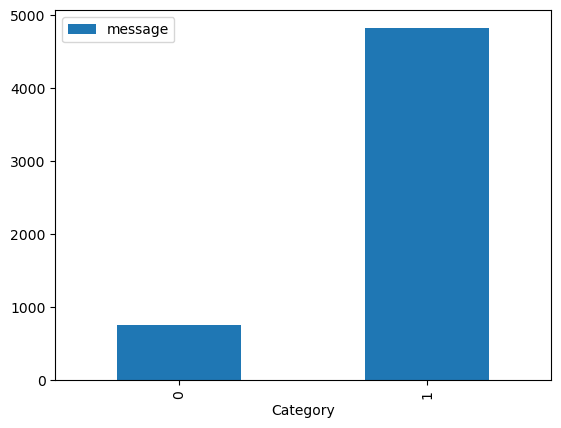

In [14]:
count = df.groupby(by=['Category']).count()
count.plot(kind='bar')

#  Cleaning the messages

In [15]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.message[i]) 
    message = message.lower()
    words = message.split() 
    words = [word for word in words if word not in set(stopwords.words('english'))] 
    words = [ps.stem(word) for word in words] 
    message = ' '.join(words) 
    corpus.append(message) 

In [16]:
def clean_text(x):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=x) 
    message = message.lower()
    words = message.split() 
    words = [word for word in words if word not in set(stopwords.words('english'))] 
    words = [ps.stem(word) for word in words] 
    message = ' '.join(words) 
    return message 

# Creating the Bag of Words model 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [18]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#  Extracting dependent variable from the dataset

In [19]:
y = pd.get_dummies(df['Category'])
y = y.iloc[:, 1].values

In [20]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

#  Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,roc_auc_score,confusion_matrix
import scikitplot as skplt

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape) 
print(Y_train.shape)
print(Y_test.shape) 

(4457, 2500)
(1115, 2500)
(4457,)
(1115,)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [26]:
y_pred = log_reg.predict(X_test)

In [27]:
print(mean_absolute_error(Y_test,y_pred))

0.02062780269058296


In [28]:
print(mean_squared_error(Y_test,y_pred))

0.02062780269058296


In [29]:
acc_score = accuracy_score(Y_test,y_pred)*100
acc_score

97.9372197309417

In [30]:
confusion_matrix(Y_test,y_pred)

array([[127,  23],
       [  0, 965]], dtype=int64)

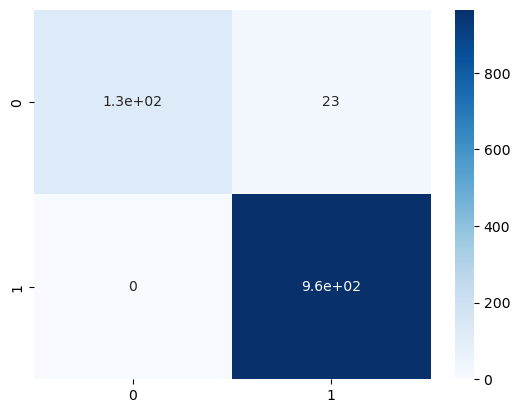

In [31]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cmap="Blues")
plt.show()

0.9885768566493954


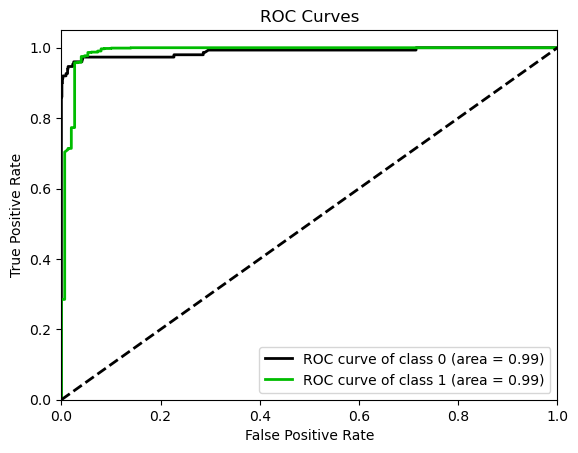

In [32]:
## ROC Curve

Y_pred_prob=log_reg.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append (i[1])
print(roc_auc_score(Y_test,class_1_prob))
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])
plt.show()

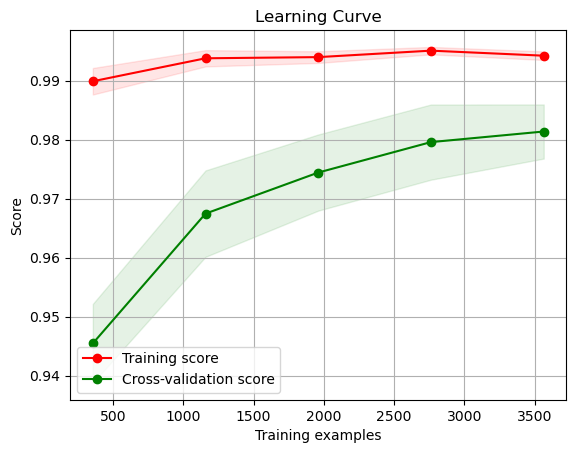

In [33]:
skplt.estimators.plot_learning_curve(log_reg,X_train,Y_train)
plt.show()

# Logistic Regression (L1 penalty)

In [34]:
log_reg_l1 = LogisticRegression(penalty='l1',solver='saga',random_state=42)
log_reg_l1.fit(X_train,Y_train)

LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [35]:
y_pred = log_reg_l1.predict(X_test)

In [36]:
acc_score_l1 = accuracy_score(Y_test,y_pred)*100
acc_score_l1

97.57847533632287

In [37]:
confusion_matrix(Y_test,y_pred)

array([[123,  27],
       [  0, 965]], dtype=int64)

0.9875993091537132


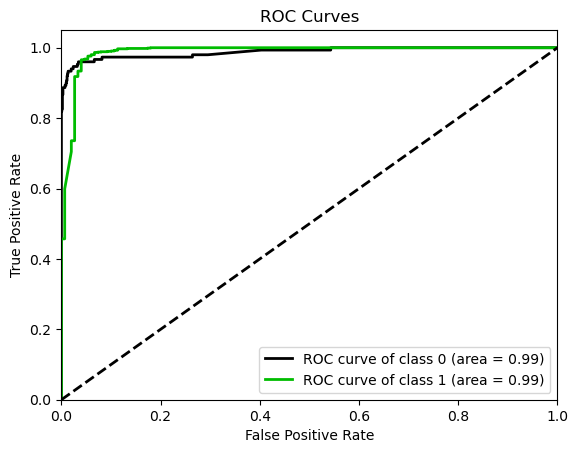

In [38]:
## ROC Curve

Y_pred_prob=log_reg_l1.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append (i[1])
print(roc_auc_score(Y_test,class_1_prob))
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])
plt.show()

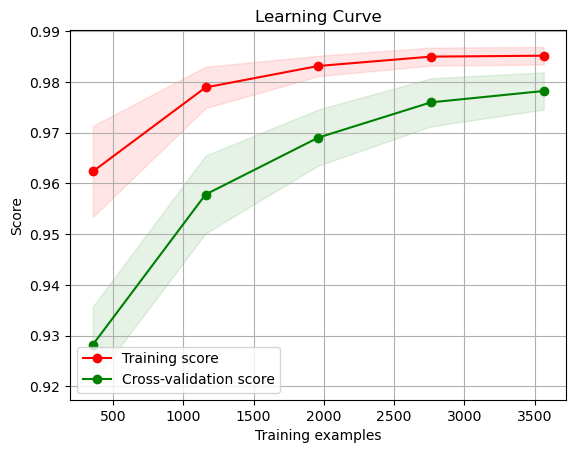

In [39]:
skplt.estimators.plot_learning_curve(log_reg_l1,X_train,Y_train)
plt.show()

# naive_bayes(GaussianNB)

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [41]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [42]:
y_pred = gnb.predict(X_test)

In [43]:
acc_score_gnb = accuracy_score(Y_test,y_pred)*100
acc_score_gnb

86.27802690582959

In [44]:
confusion_matrix(Y_test,y_pred)

array([[136,  14],
       [139, 826]], dtype=int64)

0.8813126079447322


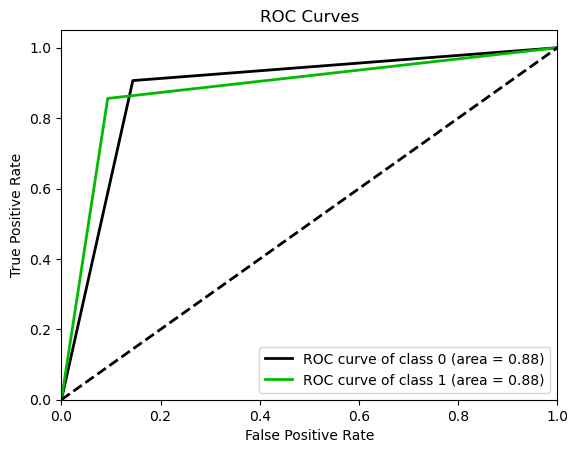

In [45]:
## ROC Curve

Y_pred_prob=gnb.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append (i[1])
print(roc_auc_score(Y_test,class_1_prob))
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])
plt.show()

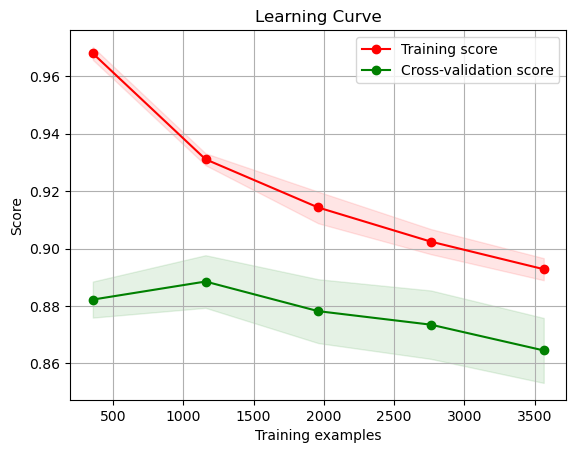

In [46]:
skplt.estimators.plot_learning_curve(gnb,X_train,Y_train)
plt.show()

# naive_bayes (MultinomialNB)

In [47]:
mul_nb  = MultinomialNB(alpha=0.1)
mul_nb.fit(X_train,Y_train)

MultinomialNB(alpha=0.1)

In [48]:
y_pred = mul_nb.predict(X_test)

In [49]:
acc_score_mul_nb = accuracy_score(Y_test,y_pred)*100
acc_score_mul_nb

98.02690582959642

In [50]:
confusion_matrix(Y_test,y_pred)

array([[141,   9],
       [ 13, 952]], dtype=int64)

0.9780241796200345


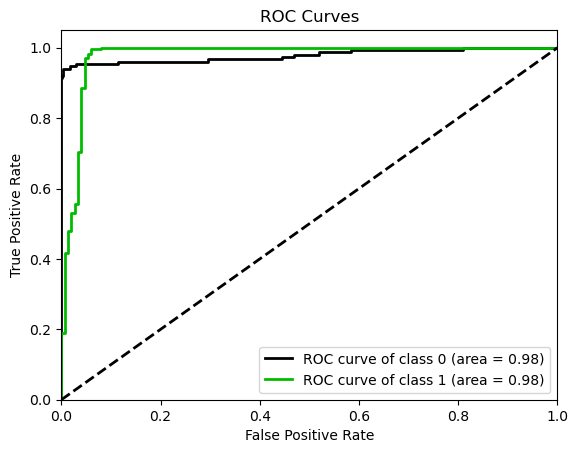

In [51]:
## ROC Curve

Y_pred_prob=mul_nb.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append (i[1])
print(roc_auc_score(Y_test,class_1_prob))
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])
plt.show()

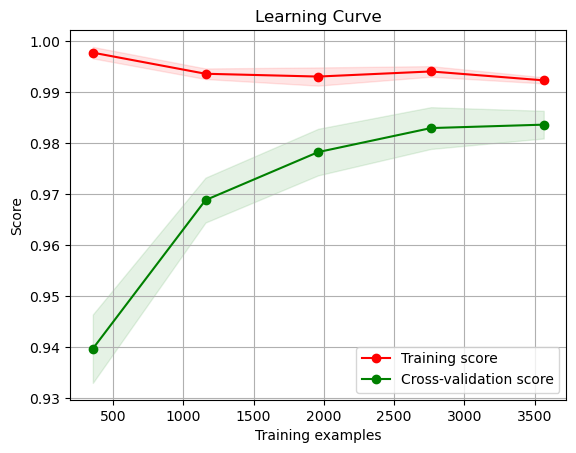

In [52]:
skplt.estimators.plot_learning_curve(mul_nb,X_train,Y_train)
plt.show()

# Suppor vector machine

In [53]:
from sklearn.svm import SVC

In [54]:
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [55]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
y_pred = svm.predict(X_test)

In [57]:
acc_score_svm = accuracy_score(Y_test,y_pred)*100
acc_score_svm

97.9372197309417

In [58]:
confusion_matrix(Y_test,y_pred)

array([[127,  23],
       [  0, 965]], dtype=int64)

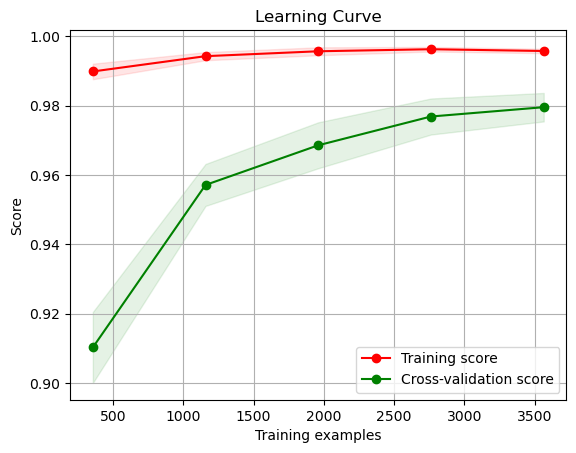

In [59]:
skplt.estimators.plot_learning_curve(svm,X_train,Y_train)
plt.show()

# DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [62]:
y_pred = dtc.predict(X_test)

In [63]:
acc_score_dtc = accuracy_score(Y_test,y_pred)*100
acc_score_dtc

97.04035874439462

0.9226977547495682


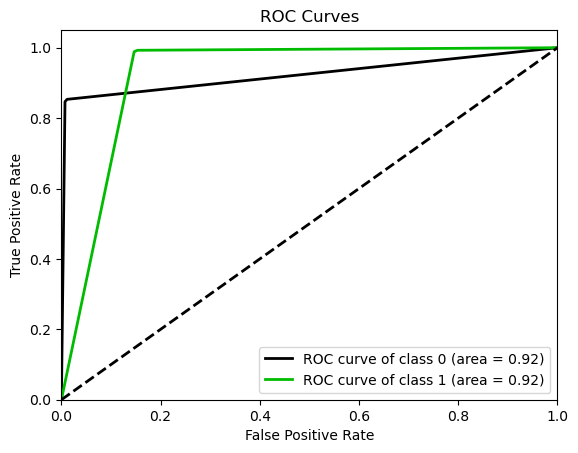

In [64]:
## ROC Curve
Y_pred_prob=dtc.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append (i[1])
print(roc_auc_score(Y_test,class_1_prob))
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])
plt.show()

In [ ]:
skplt.estimators.plot_learning_curve(dtc,X_train,Y_train)
plt.show()

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd = RandomForestClassifier()
rnd.fit(X_train,Y_train)

In [ ]:
y_pred = rnd.predict(X_test)

In [ ]:
acc_score_rnd = accuracy_score(Y_test,y_pred)*100
acc_score_rnd

In [ ]:
## ROC Curve

Y_pred_prob=rnd.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append (i[1])
print(roc_auc_score(Y_test,class_1_prob))
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])
plt.show()

In [ ]:
skplt.estimators.plot_learning_curve(rnd,X_train,Y_train)
plt.show()

# BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bgc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=500,random_state=8)
bgc.fit(X_train,Y_train)

In [ ]:
y_pred = bgc.predict(X_test)

In [ ]:
bgc_score = accuracy_score(Y_test,y_pred)*100
bgc_score

In [ ]:
## ROC Curve

Y_pred_prob=bgc.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append (i[1])
print(roc_auc_score(Y_test,class_1_prob))
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])
plt.show()

In [ ]:
models =pd.DataFrame ({
     'Model':['LogisticRegression','LogisticRegression_l1','naive_bayes(GaussianNB)',
              'naive_bayes (MultinomialNB)','Suppor vector machine',
             'DecisionTreeClassifier','RandomForestClassifier','BaggingClassifier'],
      'score':[acc_score,acc_score_l1,acc_score_gnb,acc_score_mul_nb,acc_score_svm,acc_score_dtc,acc_score_rnd,bgc_score]  
})

In [ ]:
models

In [ ]:
import seaborn as sns
sns.barplot(x=models['Model'],y=models['score'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['message'][0]

In [ ]:
# a = str(input('enter the msg'))
user_input = df['message'][0]
user_input = clean_text(user_input)
user_input = cv.transform([user_input])
print(user_input)

In [ ]:
r = rnd.predict(user_input)
if r ==0:
    print('Spam')
else:
    print('harmful')

In [ ]:
import pickle

In [ ]:
with open ('rnd','wb')as f:
    pickle.dump(rnd,f)

In [ ]:
with open ('cv','wb')as f:
    pickle.dump(cv,f)